## Multipipe Example

Consider the series-parallel system shown below. All pipes are 8 cm diameter asphalted cast iron ($\varepsilon$ = 0.12 mm). If the total pressure drop P1 − P2 = 750 kPa, find the resulting flow rate. We can assume that water has the following properties: $\rho$ = 998 $\frac{kg}{m^3}$, $\mu$ = 1.0x10$^{-3}$ $\frac{Ns}{m^2}$.

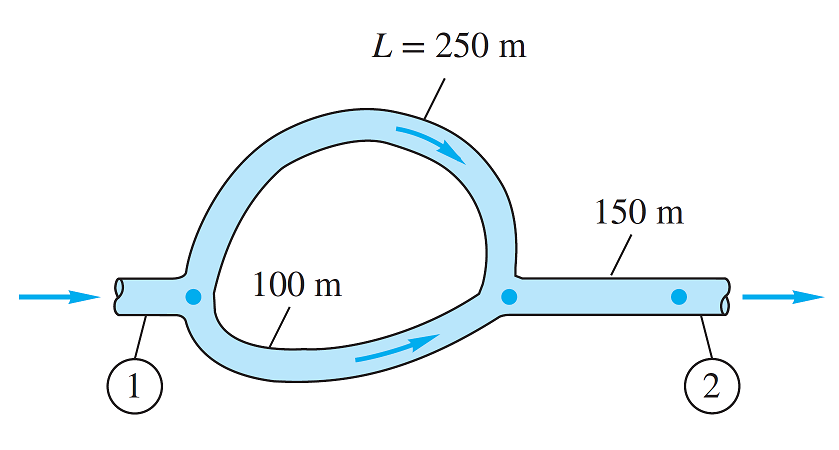

First we need to import all the necessary toolboxes...

In [1]:
# import fsolve from scipy 
from scipy.optimize import fsolve 
# import all the standard math functions and plotting stuff we'd want from numpy and matplotlib
from numpy import*
import matplotlib. pyplot
# This makes the plots appear inside the notebook
%matplotlib inline 

After importing all the necessary toolboxes, we can begin by defining our variables...

In [2]:
## Set your constants
dP = 750000 #[Pa] delta P from 1 to 2
rho = 998 #[kg/m3]
mu = 1.003e-3 #[Ns/m2]
ee = 0.12/1000 #[m] rough pipe
d = 0.08 #[m] diameter
g = 9.81 #[m/s2]
La = 250 #[m]
Lb = 100 #[m]
Lc = 150 #[m]
V = 20 #[m/s]

Next we can define our equations and call our solver function. For "fsolve" it's best to rearrange the equations as follows, noting also that we'll need one Re and one friction factor equation for each section:

Reynolds Number:

$0 = -Re + \frac{\rho V d}{\mu}$

Colebrook: 

$0 = -f + \frac{1}{\left(-2 log_{10}\left[\frac{\varepsilon/d}{3.7} + \frac{2.51}{Re_d \sqrt{f} }\right]\right)^2}$

We also need to recognize that the pressure drop (and thus headloss) across the two parallel paths is the same:

$\Delta h_A = f_A \frac{L_A}{d} \frac{V^2}{2g} = f_B \frac{L_B}{d} \frac{V^2}{2g} = \Delta h_B$

...and that the mass flow through the combined parallel sections is the same as that through to point 2:

$\dot{m}_C = \dot{m}_A + \dot{m}_B$

...and finally our energy equation reduces as follows: 

$\frac{\Delta P_{12}}{\rho g} = \Delta h_{total} = \Delta h_A + \Delta h_c$

In [3]:
# Define the equations 
def eqns(vars):
    fa, fb, fc, Va, Vb, Vc = vars
    Rea = rho*Va*d/mu # Reynolds Number
    Reb = rho*Vb*d/mu # Reynolds Number
    Rec = rho*Vc*d/mu # Reynolds Number
    #
    ffa = -fa + (1/(-2.0*log10(2.51/(Rea*sqrt(fa)) + (ee/d)/3.7)))**2 # Friction Factor
    ffb = -fb + (1/(-2.0*log10(2.51/(Reb*sqrt(fb)) + (ee/d)/3.7)))**2 # Friction Factor
    ffc = -fc + (1/(-2.0*log10(2.51/(Rec*sqrt(fc)) + (ee/d)/3.7)))**2 # Friction Factor
    #
    eq1 = -Vc + Va + Vb
    eq2 = -Vb**2 + Va**2*fa/fb*(La/Lb);
    eq3 = -dP/(rho*g) + Va**2*fa*La/(2*d*g) + Vc**2*fc*Lc/(2*d*g);
    #
    return [ffa, ffb, ffc, eq1, eq2, eq3]

# Now call the solver function with some initial guesses
fa, fb, fc, Va, Vb, Vc = fsolve(eqns, (0.02,0.02,0.02,5,5,10))

print("Va = %.3f m/s" % Va)
print("Vb = %.3f m/s" % Vb)
print("Vc = %.3f m/s" % Vc)

Va = 2.062 m/s
Vb = 3.294 m/s
Vc = 5.356 m/s
